# Sersic Profiles

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Sersic-parameter-fits" data-toc-modified-id="Sersic-parameter-fits-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sersic parameter fits</a></span></li><li><span><a href="#Timecourse-of-Sersic-profiles" data-toc-modified-id="Timecourse-of-Sersic-profiles-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Timecourse of Sersic profiles</a></span><ul class="toc-item"><li><span><a href="#Half-mass-radius" data-toc-modified-id="Half-mass-radius-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Half-mass radius</a></span></li><li><span><a href="#Sersic-parameter" data-toc-modified-id="Sersic-parameter-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Sersic parameter</a></span></li></ul></li><li><span><a href="#Bulge-mass-profiles" data-toc-modified-id="Bulge-mass-profiles-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bulge mass profiles</a></span><ul class="toc-item"><li><span><a href="#MW,-3-timepoints" data-toc-modified-id="MW,-3-timepoints-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>MW, 3 timepoints</a></span></li><li><span><a href="#M31,-3-timepoints" data-toc-modified-id="M31,-3-timepoints-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>M31, 3 timepoints</a></span></li><li><span><a href="#MW-vs-M31,-two-timepoints" data-toc-modified-id="MW-vs-M31,-two-timepoints-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>MW vs M31, two timepoints</a></span></li></ul></li></ul></div>

## Setup

In [12]:
import numpy as np
import astropy.units as u
from scipy.optimize import curve_fit

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
%matplotlib inline

from galaxy.galaxy import Galaxy
from galaxy.galaxies import Galaxies
from galaxy.centerofmass import CenterOfMass
from galaxy.massprofile import MassProfile
from galaxy.timecourse import TimeCourse

In [2]:
def get_sersic(galname, snap, R):
    mp = MassProfile(Galaxy(galname, snap, usesql=True))
    Re_bulge, bulge_total, BulgeI = mp.bulge_Re(R)
    n, err = mp.fit_sersic_n(R, Re_bulge, bulge_total, BulgeI)
    return Re_bulge, n, err

In [3]:
tc = TimeCourse()

In [4]:
# Array of radii 
R = np.arange(0.1, 30, 0.1) * u.kpc

## Sersic parameter fits

The next cell takes significant time to run so is commented out.

In [7]:
# with open('./sersic.txt', 'w') as f:
#     f.write(f"# {'gal':>5s}{'snap':>8s}{'t':>8s}{'Re':>8s}{'n':>8s}{'err':>8s}\n")
    
# for galname in ('M31','MW'):
#     print(galname)
#     for snap in np.arange(0,802):
#         t = tc.snap2time(snap)
#         try:
#             Re, n, err = get_sersic(galname, snap, R)
#             with open('./sersic.txt', 'a') as f:
#                 f.write(f"{galname:>7s}{snap:8d}{t:8.3f}{Re.value:8.2f}{n:8.2f}{err:8.4f}\n")   
#         except ValueError:
#             print(galname, snap)

## Timecourse of Sersic profiles

In [8]:
ser = np.genfromtxt('sersic_full.txt', names=True, skip_header=0,
                    dtype=[('gal', 'U3'), ('snap', '<i8'), ('t', '<f8'), ('Re', '<f8'), 
                           ('n', '<f8'), ('err', '<f8')])

In [10]:
MW = ser[ser['gal'] == 'MW']
M31 = ser[ser['gal'] == 'M31']

### Half-mass radius

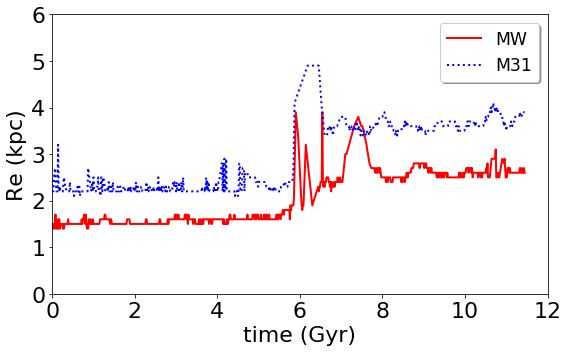

In [39]:
fig = plt.figure(figsize=(8,5))
ax0 = plt.subplot()

# add the curves
n = 1 # plot every n'th time point
ax0.plot(MW['t'][::n], MW['Re'][::n], 'r-', lw=2, label='MW')
ax0.plot(M31['t'][::n], M31['Re'][::n], 'b:', lw=2, label='M31')

ax0.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax0.set_xlabel("time (Gyr)", fontsize=22)
ax0.set_ylabel("Re (kpc)", fontsize=22)

ax0.set_xlim(0,12)
ax0.set_ylim(0,6)

# ax0.set_title("Hernquist scale radius", fontsize=24)
#adjust tick label font size
label_size = 22
rcParams['xtick.labelsize'] = label_size 
rcParams['ytick.labelsize'] = label_size

plt.tight_layout()
plt.savefig('sersic_Re.pdf', rasterized=True, dpi=350);

### Sersic parameter

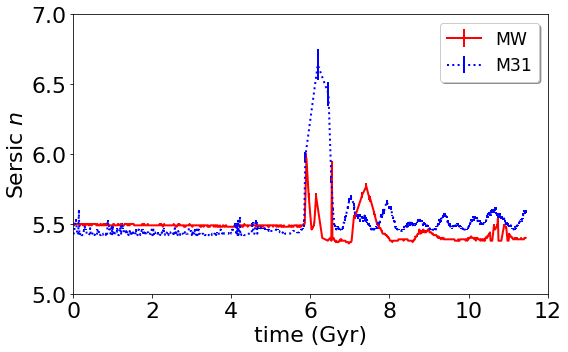

In [41]:
fig = plt.figure(figsize=(8,5))
ax0 = plt.subplot()

# add the curves
n = 1 # plot every n'th time point
ax0.errorbar(MW['t'][::n], MW['n'][::n], yerr=MW['err'][::n], fmt='r-', lw=2, label='MW')
ax0.errorbar(M31['t'][::n], M31['n'][::n], yerr=M31['err'][::n], fmt='b:', lw=2, label='M31')

ax0.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax0.set_xlabel("time (Gyr)", fontsize=22)
ax0.set_ylabel("Sersic $n$", fontsize=22)

ax0.set_xlim(0,12)
ax0.set_ylim(5,7)

# ax0.set_title("Hernquist scale radius", fontsize=24)
#adjust tick label font size
label_size = 22
rcParams['xtick.labelsize'] = label_size 
rcParams['ytick.labelsize'] = label_size

plt.tight_layout()
plt.savefig('sersic_n.pdf', rasterized=True, dpi=350);

## Bulge mass profiles

In [58]:
Re_bulge = {}
bulge_total = {}
BulgeI = {}
Sersic = {}
n = {}
for galname in ('MW','M31'):
    for snap in (1, 335, 801):
        key = f'{galname}_{snap:03}'
        mp = MassProfile(Galaxy(galname, snap, usesql=True))
        Re_bulge[key], bulge_total[key], BulgeI[key] = mp.bulge_Re(R)
        n[key], _ = mp.fit_sersic_n(R, Re_bulge[key], bulge_total[key], BulgeI[key])
        
        Sersic[key] = mp.sersic(R.value, Re_bulge[key].value, n[key], bulge_total[key])

### MW, 3 timepoints

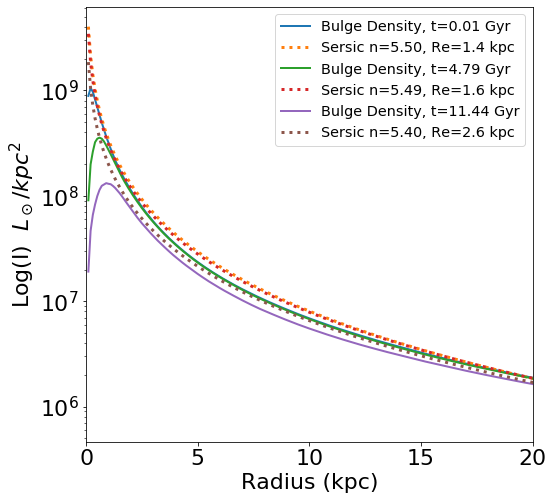

In [64]:
fig = plt.figure(figsize=(8,8))
# subplots = (121, 122)

ax0 = plt.subplot()

galname = 'MW'
for snap in (1, 335, 801):
    key = f'{galname}_{snap:03}'
    t = tc.snap2time(snap)
    
    # plot the bulge luminosity density as a proxy for surface brightness
    ax0.semilogy(R, BulgeI[key], lw=2, label=f'Bulge Density, t={t:.2f} Gyr')
    ax0.semilogy(R, Sersic[key], lw=3, ls=':',
                     label=f'Sersic n={n[key]:.2f}, Re={Re_bulge[key]:.1f}')

# Add axis labels
ax0.set_xlabel('Radius (kpc)', fontsize=22)
ax0.set_ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)

ax0.set_xlim(0,20)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax0.legend(loc='upper right',fontsize='x-large');

### M31, 3 timepoints

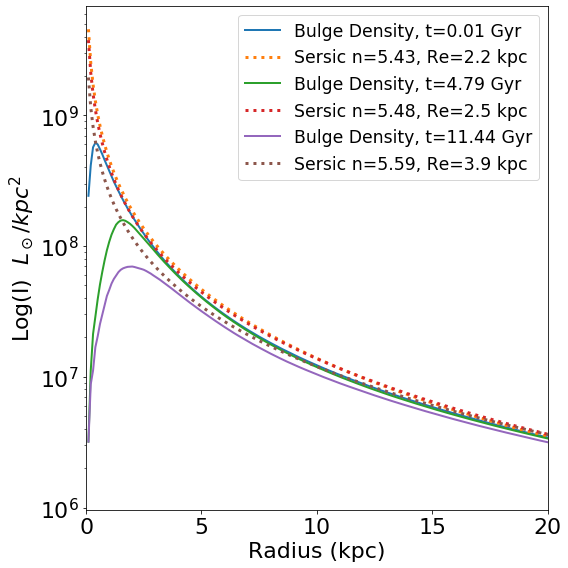

In [77]:
fig = plt.figure(figsize=(8,8))
# subplots = (121, 122)

ax0 = plt.subplot()

galname = 'M31'
for snap in (1, 335, 801):
    key = f'{galname}_{snap:03}'
    t = tc.snap2time(snap)
    
    # plot the bulge luminosity density as a proxy for surface brightness
    ax0.semilogy(R, BulgeI[key], lw=2, label=f'Bulge Density, t={t:.2f} Gyr')
    ax0.semilogy(R, Sersic[key], lw=3, ls=':',
                     label=f'Sersic n={n[key]:.2f}, Re={Re_bulge[key]:.1f}')

# Add axis labels
ax0.set_xlabel('Radius (kpc)', fontsize=22)
ax0.set_ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)

ax0.set_xlim(0,20)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax0.legend(loc='upper right',fontsize='xx-large')

plt.tight_layout()
plt.savefig('MW_bulge_sersic.pdf', rasterized=True, dpi=350);

### MW vs M31, two timepoints

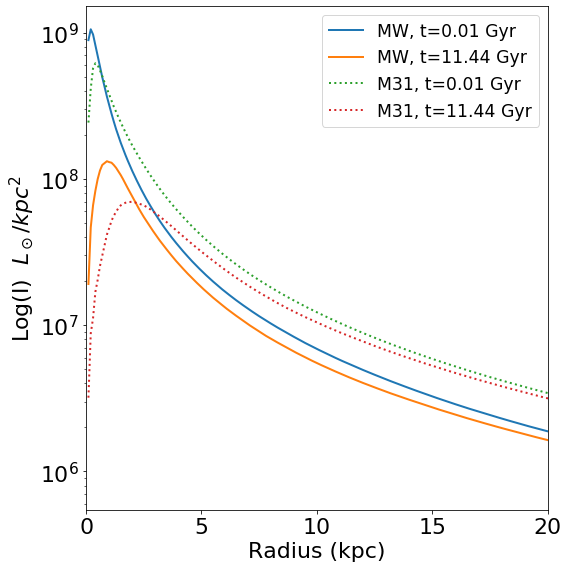

In [73]:
fig = plt.figure(figsize=(8,8))
# subplots = (121, 122)

ax0 = plt.subplot()

galname = 'MW'
for snap in (1, 801):
    key = f'{galname}_{snap:03}'
    t = tc.snap2time(snap)

    # plot the bulge luminosity density as a proxy for surface brightness
    ax0.semilogy(R, BulgeI[key], lw=2, label=f'MW, t={t:.2f} Gyr')

galname = 'M31'
for snap in (1, 801):
    key = f'{galname}_{snap:03}'
    t = tc.snap2time(snap)

    # plot the bulge luminosity density as a proxy for surface brightness
    ax0.semilogy(R, BulgeI[key], lw=2, ls=':', label=f'M31, t={t:.2f} Gyr')

# Add axis labels
ax0.set_xlabel('Radius (kpc)', fontsize=22)
ax0.set_ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)

ax0.set_xlim(0,20)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax0.legend(loc='upper right',fontsize='xx-large')

plt.tight_layout()
plt.savefig('bulge_mp.pdf', rasterized=True, dpi=350);